In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df.head(5)

,qid,scenario,question,ground_truth,student_incorrect_solution,student_profile,teacher_described_confusion,self-correctness,self-typical-confusion,self-typical-interactions,conversation
0,5000012,1,Nancy is filling an aquarium for her fish. She...,First calculate the volume of the aquarium by ...,The aquarium has a volume of 4 x 6 x 3 = 72 cu...,Steven is a 7th grade student. He has difficul...,He added a step after completing the problem.,Yes,3.0,3.0,"Teacher: (probing)Steven, If you had 4 of some..."
1,5000084,2,John is very unfit and decides to work up to d...,He needs to do 15*3=45 progressions\nThat will...,"To get to 15 reps, John will take 15 - 1 = 14 ...",Stephanie is a 7th grade student. She has diff...,She became fixated on a wrong calculation and ...,No,2.0,2.0,"Teacher: (probing)Stephanie, How many days wil..."
2,5000982,3,James has 20 pairs of red socks and half as ma...,He has 20/2=10 black socks\nSo he has 20+10=30...,James has 20/2 = 10 pairs of black socks.\nJam...,DeAndre is a 7th grade student. He has problem...,He was technically correct.,Yes,5.0,5.0,"Teacher: (probing)DeAndre, you successfully an..."
3,5000274,4,Jason drives past 3 convenience stores on his ...,First find the additional distance between the...,The distance between the second store and thir...,Winnie is a 7th grade student. She struggle to...,He understood it when it was broken down step ...,Yes,3.0,3.0,Teacher: (probing)What is the distance between...
4,5000797,5,Wanda walks her daughter .5 miles to school in...,She walks .5 miles to school and back 4 times ...,"Every day, Wanda walks a total of 0.5 + 0.5 = ...",Cody is a 7th grade student. He has problem wi...,He forgot she walked twice each day!,Yes,3.0,3.0,"Teacher: (probing)Cody, How far doe Wanda walk..."


# Extracting student names

In [7]:
import matplotlib.pyplot as plt

In [4]:
for index, row in df.iterrows():
    student_name = row['student_profile'].split(" ")[0].strip()
    df.at[index, 'student_name'] = student_name

In [15]:
!pip install seaborn

C:\Users\athar\AppData\Local\Temp\ipykernel_25656\3382914717.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=name_counts_df, x='student_name', y='frequency', palette="viridis")


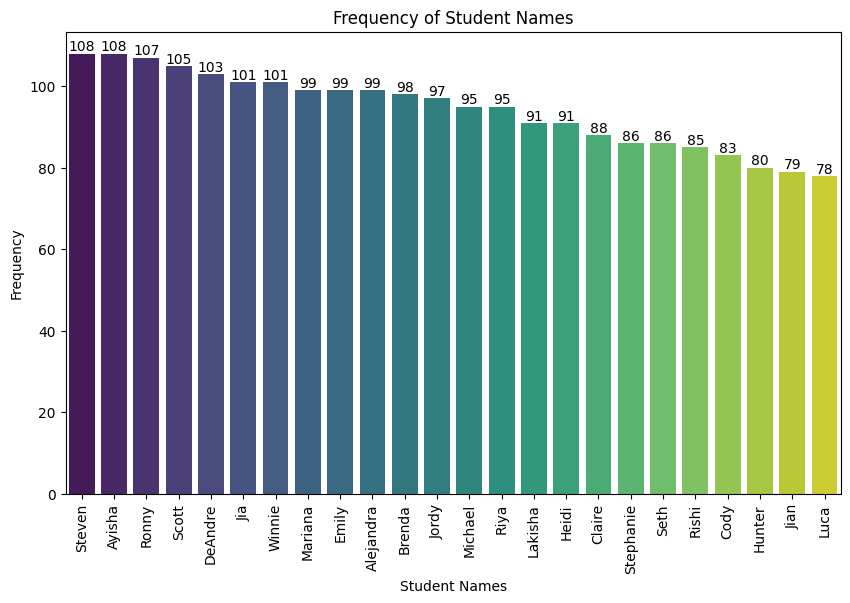

In [18]:
import seaborn as sns

# Count the frequency of each student name
name_counts = df['student_name'].value_counts()

# Create a DataFrame from the counts for easier plotting
name_counts_df = name_counts.reset_index()
name_counts_df.columns = ['student_name', 'frequency']

# Plot the histogram using seaborn or matplotlib
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=name_counts_df, x='student_name', y='frequency', palette="viridis")

for i in barplot.containers:
    barplot.bar_label(i)

# Customize the plot
plt.xticks(rotation=90)  # Rotate names if there are many
plt.xlabel("Student Names")
plt.ylabel("Frequency")
plt.title("Frequency of Student Names")

# Show plot
plt.show()


## Conclusion: Seems fairly balanced for student profiling

## Student Profiles

In [32]:
for index, row in df.iterrows():
    student_profile = row['student_profile']

    student_profile_processed = student_profile.replace(f"{row['student_name']} is a 7th grade student.", "")

    student_profile_processed = student_profile_processed.strip().replace("He", "Student")
    student_profile_processed = student_profile_processed.strip().replace("She", "Student")

    df.at[index, 'student_profile_processed'] = student_profile_processed

C:\Users\athar\AppData\Local\Temp\ipykernel_25656\929027557.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=name_counts_df, x='student_profile_processed', y='frequency', palette="viridis")


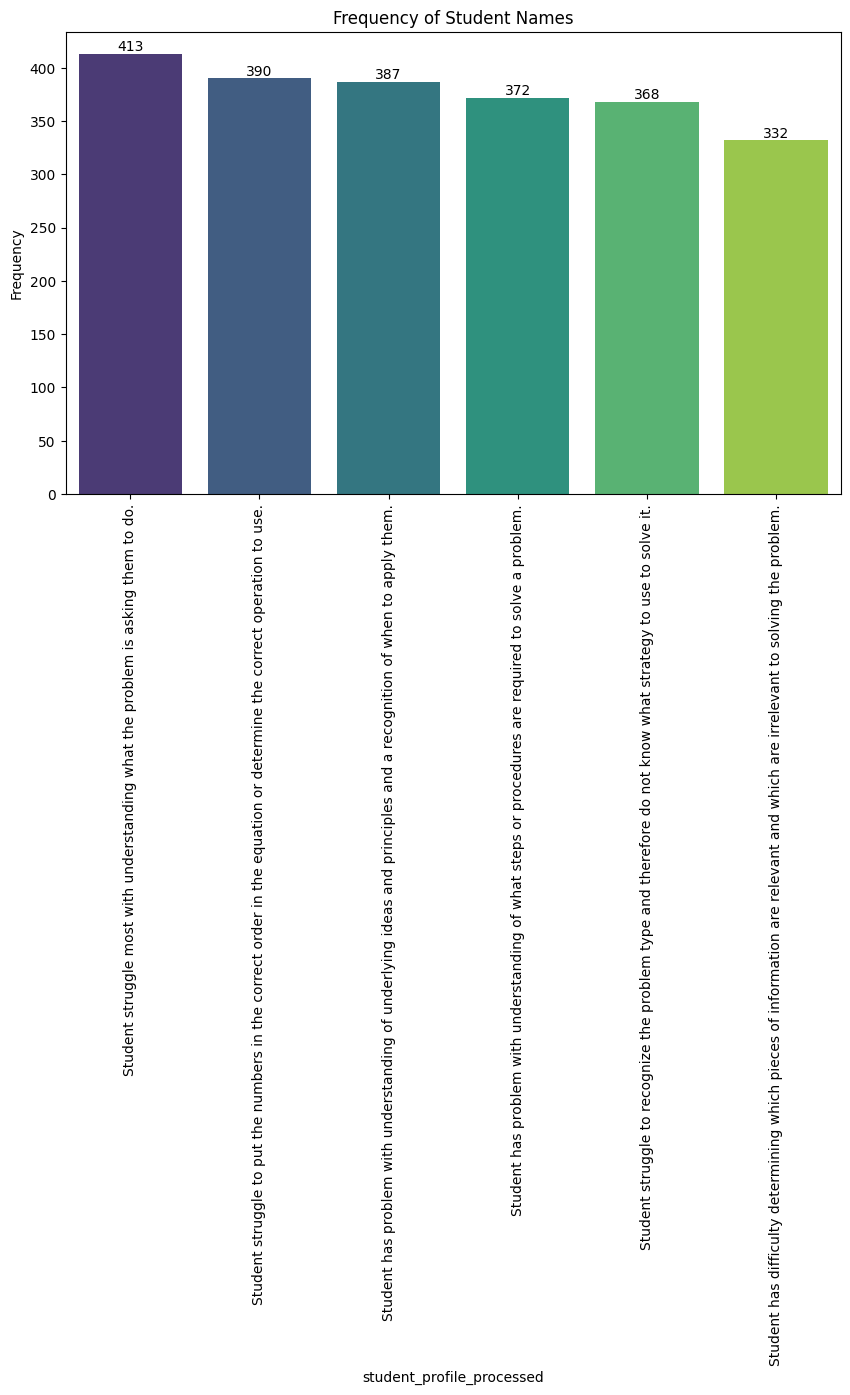

In [33]:

# Count the frequency of each student name
name_counts = df['student_profile_processed'].value_counts()

# Create a DataFrame from the counts for easier plotting
name_counts_df = name_counts.reset_index()
name_counts_df.columns = ['student_profile_processed', 'frequency']

# Plot the histogram using seaborn or matplotlib
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=name_counts_df, x='student_profile_processed', y='frequency', palette="viridis")

for i in barplot.containers:
    barplot.bar_label(i)

# Customize the plot
plt.xticks(rotation=90)  # Rotate names if there are many
plt.xlabel("student_profile_processed")
plt.ylabel("Frequency")
plt.title("Frequency of Student Names")

# Show plot
plt.show()


In [35]:
df['student_profile_processed'].value_counts()

student_profile_processed
Student struggle most with understanding what the problem is asking them to do.                                                 413
Student struggle to put the numbers in the correct order in the equation or determine the correct operation to use.             390
Student has problem with understanding of underlying ideas and principles and a recognition of when to apply them.              387
Student has problem with understanding of what steps or procedures are required to solve a problem.                             372
Student struggle to recognize the problem type and therefore do not know what strategy to use to solve it.                      368
Student has difficulty determining which pieces of information are relevant and which are irrelevant to solving the problem.    332
Name: count, dtype: int64

### Conclusion: Student profiling dataset seems pretty balanced too

## Teacher Described Confusion

In [49]:
for index, row in df.iterrows():
    teacher_described_confusion = row['teacher_described_confusion']

    if pd.isna(teacher_described_confusion):
        pass
    else:
        print(teacher_described_confusion)
        teacher_described_confusion = teacher_described_confusion.replace("He", "Student")
        teacher_described_confusion = teacher_described_confusion.replace("She", "Student")
        teacher_described_confusion = teacher_described_confusion.replace("student", "Student")

        df.at[index, 'teacher_described_confusion_processed'] = teacher_described_confusion

He added a step after completing the problem.
She became fixated on a wrong calculation and couldn't let go.
He was technically correct.
He understood it when it was broken down step by step
He forgot she walked twice each day!
Student miscalculated in the first step by multiplying slices and customers instead of dividing
Student failed to notice the calculation was for half a semester, not a full semester so used the wrong number for the basis of one calculation.
Student duplicated division of groups
Student employed an overly complex approach with equations when a simpler solution was sounder.
Student both divided and multipled by a time period
they did not add the entrance fee on
they didnt get the concept of how many plates per day
they did not add the 3 amounts together
they hadn;t used all their calculatiosn together
they used the wrong formulas
repeating mistakes
difficulty in understanding phrases like 'half of' 'twice than' '4 months from now' etc
problem in understanding the 

In [52]:
df['teacher_described_confusion_processed'].value_counts()

teacher_described_confusion_processed
confusion in understanding the meaning of the question.                                                                                      7
Student was doing a repetitive error                                                                                                         3
went too far                                                                                                                                 3
Repetitive addition                                                                                                                          2
overcomplicating                                                                                                                             2
                                                                                                                                            ..
Student miscalculated his first step by subtracting a number instead of multiplying                     

### Since it is not exactly balanced we might have to use text to text generarion here, an SLM like BERT, T5 will do. You can also experiment with llama 1B models 

## Self Typical confusion, Self typical interactions

C:\Users\athar\AppData\Local\Temp\ipykernel_25656\1539641461.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=name_counts_df, x='self-typical-confusion', y='frequency', palette="viridis")


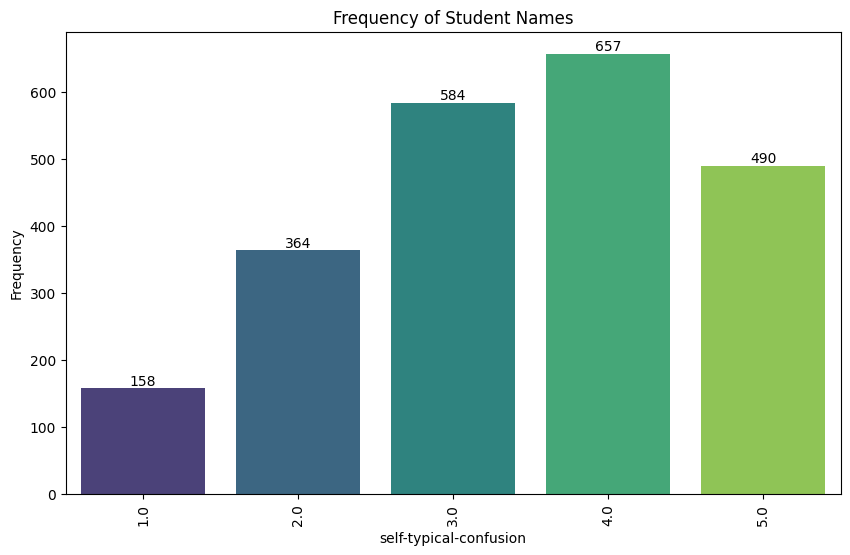

In [57]:

# Count the frequency of each student name
name_counts = df['self-typical-confusion'].value_counts()

# Create a DataFrame from the counts for easier plotting
name_counts_df = name_counts.reset_index()
name_counts_df.columns = ['self-typical-confusion', 'frequency']

# Plot the histogram using seaborn or matplotlib
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=name_counts_df, x='self-typical-confusion', y='frequency', palette="viridis")

for i in barplot.containers:
    barplot.bar_label(i)

# Customize the plot
plt.xticks(rotation=90)  # Rotate names if there are many
plt.xlabel("self-typical-confusion")
plt.ylabel("Frequency")
plt.title("Frequency of Student Names")

# Show plot
plt.show()


In [59]:
df.columns

Index(['qid', 'scenario', 'question', 'ground_truth',
       'student_incorrect_solution', 'student_profile',
       'teacher_described_confusion', 'self-correctness',
       'self-typical-confusion', 'self-typical-interactions', 'conversation',
       'student_name', 'student_profile_processed',
       'teacher_described_confusion_processed'],
      dtype='object')

C:\Users\athar\AppData\Local\Temp\ipykernel_25656\1452688696.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=name_counts_df, x='self-typical-interactions', y='frequency', palette="viridis")


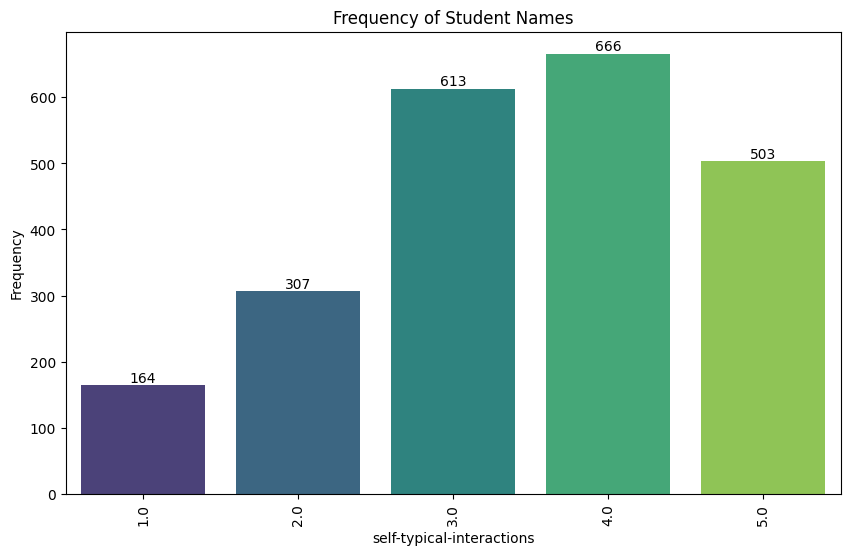

In [60]:

# Count the frequency of each student name
name_counts = df['self-typical-interactions'].value_counts()

# Create a DataFrame from the counts for easier plotting
name_counts_df = name_counts.reset_index()
name_counts_df.columns = ['self-typical-interactions', 'frequency']

# Plot the histogram using seaborn or matplotlib
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=name_counts_df, x='self-typical-interactions', y='frequency', palette="viridis")

for i in barplot.containers:
    barplot.bar_label(i)

# Customize the plot
plt.xticks(rotation=90)  # Rotate names if there are many
plt.xlabel("self-typical-interactions")
plt.ylabel("Frequency")
plt.title("Frequency of Student Names")

# Show plot
plt.show()


In [61]:
df['qid'].unique

<bound method Series.unique of 0       5000012
1       5000084
2       5000982
3       5000274
4       5000797
         ...   
2257    5000895
2258    5000596
2259    5000862
2260    5000171
2261    5000143
Name: qid, Length: 2262, dtype: int64>